In [1]:
import numpy as np    
import pandas as pd

import tensorflow as tf                       
                       
import matplotlib.pyplot as plt   
import seaborn as sns            

In [2]:
from tensorflow.keras.datasets.mnist import load_data   

In [3]:
(X_train, y_train) , (X_test, y_test) = load_data() 

In [4]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [5]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

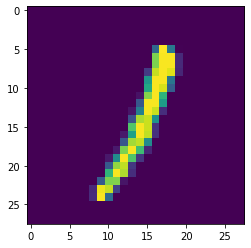

In [8]:
plt.imshow(X_train[99]);

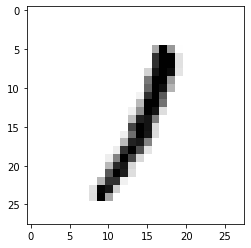

In [9]:
plt.imshow(X_train[99], cmap= plt.cm.binary);

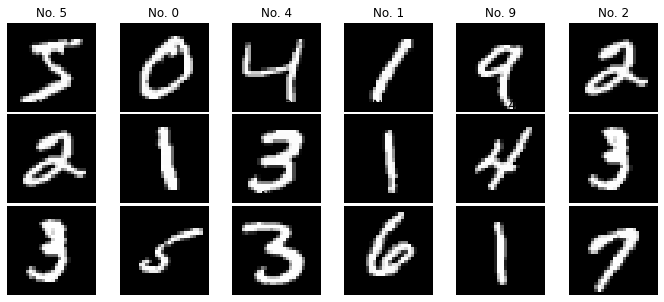

In [10]:
num_rows, num_cols = 3, 6       
f, ax = plt.subplots(3, 6, figsize=(12,5),
                     gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title(f'No. {y_train[image_index]}')
plt.show()
plt.close()

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

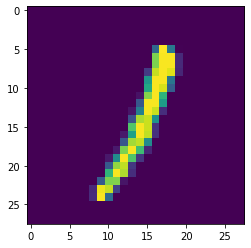

In [12]:
plt.imshow(X_train[99]);

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)
y_test.shape

# Different ways to do labelEncoding and get dummies together. Nice...

(10000, 10)

In [19]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))


opt = Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss',patience = 2)

In [25]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split = 0.1 , callbacks=[early_stop])


Epoch 1/10
1688/1688 [==============================] - 10s 4ms/step - loss: 0.1608 - accuracy: 0.9528 - val_loss: 0.0670 - val_accuracy: 0.9820
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0527 - accuracy: 0.9836 - val_loss: 0.0482 - val_accuracy: 0.9885
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0498 - val_accuracy: 0.9868
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0500 - val_accuracy: 0.9877


In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
model.history.history 

{'loss': [0.16080671548843384,
  0.052693016827106476,
  0.03249745070934296,
  0.023220999166369438],
 'accuracy': [0.952833354473114,
  0.9835740923881531,
  0.9901296496391296,
  0.9924444556236267],
 'val_loss': [0.06697238981723785,
  0.048231739550828934,
  0.0498170405626297,
  0.0499720573425293],
 'val_accuracy': [0.9819999933242798,
  0.9884999990463257,
  0.9868333339691162,
  0.987666666507721]}

In [28]:
history = pd.DataFrame(model.history.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.160807,0.952833,0.066972,0.982000
1,0.052693,0.983574,0.048232,0.988500
2,0.032497,0.990130,0.049817,0.986833
3,0.023221,0.992444,0.049972,0.987667


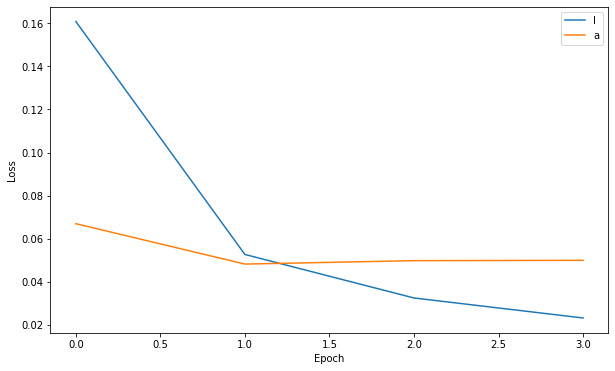

In [29]:
plt.figure(figsize=(10,6))
plt.plot(history.loss)            
plt.plot(history.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels');

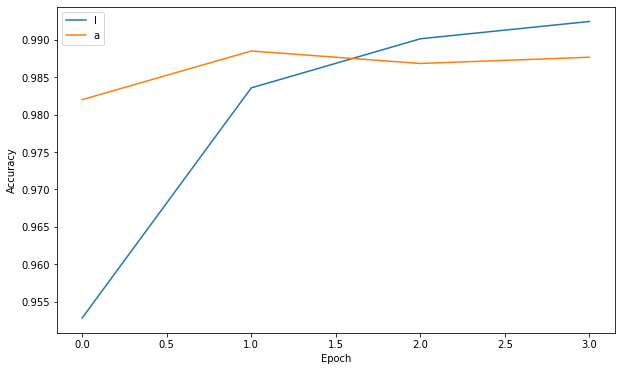

In [30]:
plt.figure(figsize=(10,6))
plt.plot(history.accuracy)       
plt.plot(history.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [31]:
scores = model.evaluate(X_test,y_test,verbose=1)
print(scores)

313/313 [==============================] - 1s 2ms/step - loss: 0.0442 - accuracy: 0.9849
[0.04419832304120064, 0.9848999977111816]


In [32]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.04419832304120064
Test accuracy: 0.9848999977111816


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
print(y_pred)
print(y_pred.shape)

313/313 [==============================] - 1s 1ms/step
[[1.1880508e-08 3.9933826e-07 9.2327309e-06 ... 9.9997389e-01
  1.2967565e-06 1.2054792e-07]
 [6.6781460e-09 3.7431996e-04 9.9962556e-01 ... 7.4997321e-11
  6.5825326e-08 4.0711496e-09]
 [5.1809968e-07 9.9993944e-01 2.5735128e-06 ... 2.0597421e-05
  8.9730238e-06 4.4779476e-08]
 ...
 [2.8703294e-12 3.8609533e-09 3.6887723e-10 ... 3.9784895e-06
  1.5660175e-06 1.1880627e-06]
 [7.5036877e-10 3.7821573e-09 2.5396909e-12 ... 1.1878278e-08
  8.2289429e-05 9.6454480e-09]
 [3.7569091e-08 2.2651041e-12 1.7726346e-09 ... 2.9088839e-12
  6.8384644e-08 2.3883417e-12]]
(10000, 10)


In [34]:
print(y_test)
print(y_test.shape)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 10)


In [35]:
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test , axis = 1)

In [36]:
y_test[0]

7

In [37]:
y_pred[0]

7

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [39]:
print(confusion_matrix(y_test, y_pred))

[[ 971    1    2    0    0    1    3    1    1    0]
 [   0 1130    2    0    0    0    2    0    1    0]
 [   3    1 1013    4    0    0    0    4    6    1]
 [   0    0    0 1005    0    4    0    0    1    0]
 [   2    0    1    0  964    0    3    0    2   10]
 [   1    0    0    8    0  879    3    0    1    0]
 [   5    3    0    0    1    8  938    0    3    0]
 [   0    0   10    2    0    0    0 1014    1    1]
 [   2    0    1   10    0    1    1    1  956    2]
 [   0    1    0    9    5    3    1    5    6  979]]


In [40]:
my_number = X_test[5]

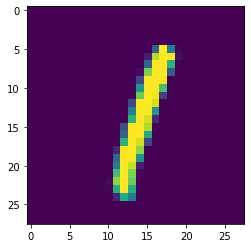

In [41]:
plt.imshow(my_number.reshape(28,28));   

In [42]:
model.predict(my_number.reshape(1,28,28,1))

1/1 [==============================] - 0s 31ms/step


array([[5.6117692e-08, 9.9995935e-01, 8.6334984e-07, 9.7414379e-09,
        5.4144889e-06, 1.8297065e-08, 2.2484186e-07, 3.1965799e-05,
        2.1363651e-06, 5.3110899e-08]], dtype=float32)

In [43]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

1/1 [==============================] - 0s 15ms/step


array([1])

In [44]:
model.save("CNN-1.h5")

In [ ]:
# Done